# Introducción a Pandas

El objetivo de esta entrega es conocer las principales estructuras con las que trabaja Pandas. Como cargar datos de diferentes fuentes y como guardarlos en distintos formatos. También veremos algunos métodos y atributos de un DataFrame.

Está dirigido a personas que esten comenzando a aprender Pandas o que busquen repasar conceptos. Siempre se descubre un metodo o funcionalidad nueva. 

Les brindo los medios de contacto por si tienen alguna inquietud o aporte a la guia. Espero que lo disfruten y les sea de utilidad, Franco Medina.

Repositorio de GitHub: https://github.com/francomedin

Perfil de LinkedIn: https://bit.ly/3CPkKCu

## *¿Que es Pandas?*


Pandas es una de las librerías mas utilizadas en Ciencia de datos, se usa en áreas de analítica, estadística, economía e inclusive análisis de lenguaje. Su gran área de aplicación se debe a que la forma en que manipula y estructura los datos **permite extraer de una forma muy simple gran valor de los mismos.**


<span style="color:green">Dato de color:</span> Fue inventada en el 2008 por Wes McKinney por la necesidad de analizar grandes volúmenes de datos en los mercados financieros.

## *Series*

Las series son arrays de una dimensión que permiten almacenar información de diversa tipología. Como se puede apreciar en la imagen, cuenta con etiqueta o label en las filas  (columna sombreada). No posee etiqueta en la columna.
    
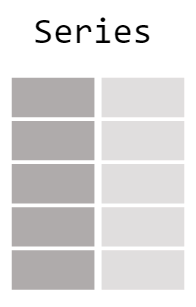
*Fuente:* *[Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/01_table_oriented.html)*.

<span style="color:green">Dato de color:</span> Una serie solo pueden tener en su interior un tipo de dato. No podemos mezclar int con str, etc.

# *DataFrame*

Un data frame es una estructura de datos rectangular, que contiene las variables o features en las columnas y las observaciones en las filas. Sus ejes se encuentran indexados/etiquetados, los indices en las columnas pueden ser int o str. Los indices en las filas, ademas de enteros y strings pueden ser una fecha (ampliamente utilizadas cuando en series de tiempo).

En el siguiente DataFrame vemos como las filas se encuentran indexadas por fecha, en este caso por año. 

También podemos ver que esta compuesto por series, por ejemplo la serie Gender.


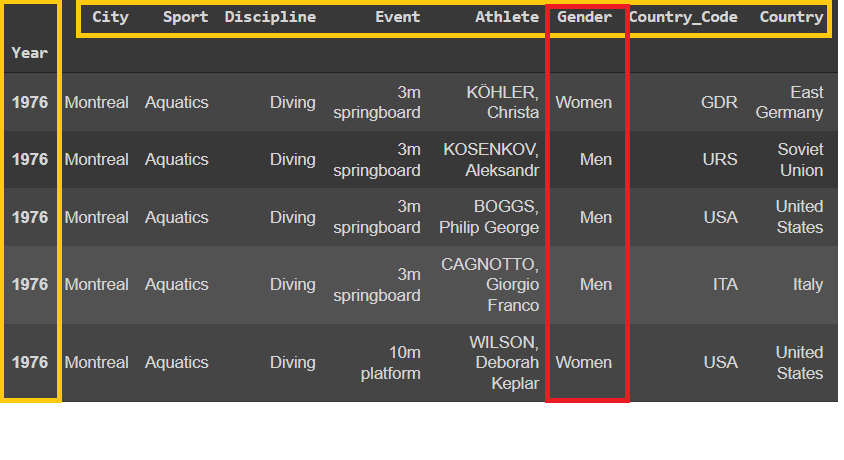
*Fuente:* Creación propia.

<span style="color:green">Dato de color:</span> Cada columna de una DataFrame es una Serie, entonces, un DataFrame esta compuesto por n Series.

### *¿Y si empezamos con el codigo?*

![Alt Text](https://acegif.com/wp-content/uploads/cat-typing-2.gif)

## *Formas de cargar datos a un DataFrame*

<span style="color:green">Dato de color:</span> Podes empezar a practicar solo abriendo Colab. A continuación adjunto link utiles:

<ol>
    <li><a href="https://colab.research.google.com/?hl=es">Colab</a></li>
    <li><a href="https://www.kaggle.com/fossouodonald/titaniccsv">Descarga titanic.csv</a></li>
    <li><a href="https://pandas.pydata.org/pandas-docs/stable/index.html">Documentación de Pandas </a></li>
 
</ol>

In [161]:
#Importamos Pandas. Por convención utilizamos pd.
import pandas as pd

**Instanciar un objeto DataFrame Vacio**

data_set=pd.DataFrame()

**Cargar un DataFrame desde un archivo CSV**

In [162]:
data_set=pd.read_csv('titanic.csv')
#Algunas variante
data_set=pd.read_csv('titanic.csv',header=0,sep=',',thousands=',',decimal='.')
data_set.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


**Cargar un DataFrame desde un archivo Microsoft Excel**

<span style="color:green">Dato de color:</span> Es necesario que cuentes con un archivo.xlsx en el directorio. Reemplaza "planilla" por el nombre de tu archivo.

In [163]:
archivo_excel=pd.ExcelFile('planilla.xlsx')
d={} #Creamos un diccionario vacio.
for sheet_name in archivo_excel.sheet_names:
    data_set=archivo_excel.parse(sheet_name)
    d[sheet_name]=df
    
#otra opción:  data_set=pd.read_excel('planilla.xlsx')

**Cargar un DataFrame desde datos en objetos Series**

In [164]:
s1=pd.Series(range(4))
s2=s1*3
data_set=pd.concat([s1,s2],axis=1)
data_set.head(4)

,0,1
0,0,0
1,1,3
2,2,6
3,3,9


**Cargar un DataFrame desde un Diccionario**

In [165]:
data_set=pd.DataFrame({
    'col1':['A','B','C','D'],
    'col2':[1,2,3,4]
})
data_set.head()

,col1,col2
0,A,1
1,B,2
2,C,3
3,D,4


## *¿Como guardamos los datos?*

**Guardar un DataFrame en formato CSV**

In [166]:
data_set.to_csv('csv_guardado.csv',encoding='utf-8')

**Guardar un DataFrame en formato excel**

In [167]:
from pandas import ExcelWriter
writer=ExcelWriter('excel_name.xlsx')
data_set.to_excel(writer,'Sheet1')
writer.save()

**Guardar un DataFrame en objetos Python**

In [168]:
dic=data_set.to_dict()  #A diccionario
s=data_set.to_string() # A string


In [169]:
dic

{'col1': {0: 'A', 1: 'B', 2: 'C', 3: 'D'}, 'col2': {0: 1, 1: 2, 2: 3, 3: 4}}

*Pandas soporta distintas fuentes y tipo de datos. También nos permite almacenarlos. A continuación, vemos una ilustración con ejemplos.*

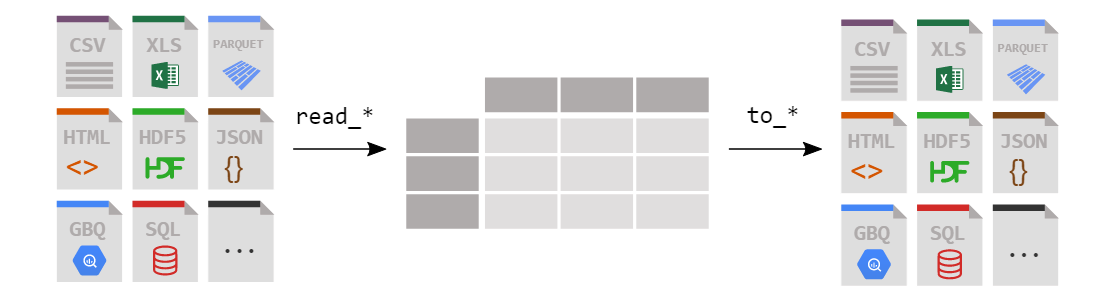
*Fuente:* *[Pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/index.html#getting-started).*

## *Trabajando con todo el DataFrame* 

Utilizaremos un data set de prueba provisto en la libreria sklearn. También llamados "toy" dataset.

*A partir de ahora abreviaremos data_set ---> ds*

<a href="https://scikit-learn.org/stable/datasets/toy_dataset.html">Ejemplos de Toy Dataset</a>



In [38]:
from sklearn import datasets

In [131]:
iris = datasets.load_iris()
ds = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [96]:
# Obtenemos las primeras n filas. Por defecto n=5
ds.head(3) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [95]:
# Obtenemos las ultimas n filas. Por defecto n=5
ds.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [83]:
# Nos brinda el nombre de las columnas, la cantidad y tipo de datos como así también los datos Nulls.
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [84]:
# Obtenemos medidas estadisticas de cada columna.
ds.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<span style="color:blue">Ejercitación:</span>

A simple vista:
<ol>
    <li>¿Cual es la media del sepal lenght?</li>
    <li>¿Cual es el máximo valor del petal width?</li>
    <li>¿Qué columna o feature presenta mayor desviación estandar?</li>    
</ol>


### **Ver Atributos no indexados del DataFrame**
<span style="color:green">Dato de color:</span> Al ser atributos del DataFrame accedemos con DataFrame.atributo

In [133]:
# Transpone la matriz, se obtiene al intercambiar filas por columnas.
ds.T 

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
target,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [88]:
# Lista las filas y columnas del Data Set
x_axes,y_axes=ds.axes 
y_axes

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [93]:
# Obtenemos el tipo de cada columna del dataset
s=ds.dtypes
s

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [69]:
# Retorna True si el DataFrame se encuentra vacio
b=ds.empty 
b

False

In [170]:
# Obtenemos el numero de Ejes.
i=ds.ndim 
i

2

In [91]:
# Obtenemos una lista =( cant_filas, cant_columnas)
t=ds.shape 
t

(150, 5)

In [97]:
# Obtenemos cant_filas * cant_columnas
i=ds.size 
i

750

<span style="color:blue">Ejercitación:</span>

¿Que valores obtenemos si mostramos? x_axes 

Si:

x_axes,y_axes=ds.axes 

Sabemos que:

y_axes= Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')
      


<span style="color:green">Dato de color:</span> Podés remitirte al método ds.head() para ver el indice de las filas.

### **Metodos Utiles del DataFrame**
<span style="color:green">Dato de color:</span> Al ser metodos del DataFrame accederemos con DataFrame.metodo()

In [98]:
# Copia el DataFrame
ds2=ds.copy()
ds2.head(3)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [103]:
# Ordena el Dataset segun la feature.
ds_sorted=ds.sort_values(by='petal width (cm)') 
ds_sorted.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
32,5.2,4.1,1.5,0.1,0.0
13,4.3,3.0,1.1,0.1,0.0


In [107]:
# Ordena el DataFrame segun el Indice de forma descendiente.
ds_sorted=ds.sort_index(ascending=False) 
ds_sorted.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
149,5.9,3.0,5.1,1.8,2.0
148,6.2,3.4,5.4,2.3,2.0
147,6.5,3.0,5.2,2.0,2.0


In [124]:
# Acceder a una columna del Data set:
#ds['Nombre de la culmna']
# Obtenemos una serie
ds['sepal length (cm)'].head(3)


0    5
1    4
2    4
Name: sepal length (cm), dtype: int32

In [136]:
# Con doble [[]] obtenemos un objeto DataFrame
ds[['sepal length (cm)']].head(3)


,sepal length (cm)
0,5.1
1,4.9
2,4.7


In [115]:
# Convierte la columna "sepal length (cm)" de float a int.
ds['sepal length (cm)']=ds['sepal length (cm)'].astype(int)  
ds.head(2)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5,3.5,1.4,0.2,0
1,4,3.0,1.4,0.2,0


### **Operaciones Matemáticas con todo el DataFrame**

In [141]:
# Sumar a todo el DataSet otro dataFrame, una serie o un valor.
ds2=ds.add(5)

ds2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,10.1,8.5,6.4,5.2,5.0
1,9.9,8.0,6.4,5.2,5.0
2,9.7,8.2,6.3,5.2,5.0
3,9.6,8.1,6.5,5.2,5.0
4,10.0,8.6,6.4,5.2,5.0


In [146]:
# Dividir a todo el DataSet otro dataFrame, una serie o un valor.
ds_div=ds.div(2)

ds_div.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,2.55,1.75,0.70,0.1,0.0
1,2.45,1.50,0.70,0.1,0.0
2,2.35,1.60,0.65,0.1,0.0


In [155]:
# Obtenemos la cantidad, máximo, minimo, media y mediana de cada columna del dataset 
medidas={'count':ds.count(),'max':ds.max(),'min':ds.min(),'mean':ds.mean(),'median':ds.median()}

ds_medidas=pd.DataFrame(data=medidas)
ds_medidas

,count,max,min,mean,median
sepal length (cm),150,7.9,4.3,5.843333,5.80
sepal width (cm),150,4.4,2.0,3.057333,3.00
petal length (cm),150,6.9,1.0,3.758000,4.35
petal width (cm),150,2.5,0.1,1.199333,1.30
target,150,2.0,0.0,1.000000,1.00


<span style="color:green">Dato de color:</span> En caso de que busquemos obtener una medida estadistica para las filas debemos especificarlo.

Por ejemplo : ds.min(axis=1)

Obtendremos el valor minimo de cada fila.

<h1 style="text-align: center;">Fin de la primer entrega</h1>
<h2 style="text-align: center;">Felicitaciones si llegaste hasta este punto</h2>

<p>Esta es la primera de varias entregas, aún se encuentra en construcción y todo feedback para mejorarla es bienvenido. Espero que haya sido util a tu aprendisaje o repaso. Quedo a disposición ante cualquier consulta.</p>

En la proxima entrega vamos a ver como seleccionar y filtrar columnas y datos. La voy a subir a 

Perfil de LinkedIn: https://bit.ly/3CPkKCu

Repositorio de GitHub: https://github.com/francomedin

Franco Medina



![Alt Text](https://media.giphy.com/media/jJQC2puVZpTMO4vUs0/giphy.gif)    